**Author:** [Piyush Tada](http://google.com)  
**Python version:**  3.x

In [55]:
# Loading important libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_lift_curve
import nbconvert

# Data Preparation

In [61]:
def getting_data_ready():

    # for loading all the data
    df = pd.read_csv('/Users/piyush2017/Code/2020_Data_Mining_Project_02/data_mining_2020_project_occupancy_detection/data/preprocessdatatrainingcopy.csv')
    df_test1 = pd.read_csv('/Users/piyush2017/Code/2020_Data_Mining_Project_02/data_mining_2020_project_occupancy_detection/data/scaled_datatestcopy.csv')
    df_test2 = pd.read_csv('/Users/piyush2017/Code/2020_Data_Mining_Project_02/data_mining_2020_project_occupancy_detection/data/scaled_datatest2copy.csv')

    class_name = "Occupancy"

    attributes = [col for col in df.columns if col != class_name]
    X_train = df[attributes].values
    y_train = df['CO2']

    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

    attributes = [col for col in df.columns if col != class_name]
    X_test1 = df_test1[attributes].values
    y_test1 = df_test1[class_name]


    attributes = [col for col in df.columns if col != class_name]
    X_test2 = df_test2[attributes].values
    y_test2 = df_test2[class_name]
    
    
    return X_train, X_test, y_train, y_test, X_test1, y_test1, X_test2, y_test2

In [62]:
X_train, X_test, y_train, y_test, X_test1, y_test1, X_test2, y_test2 = getting_data_ready()

In [64]:
X_train.T[0].reshape(-1,1)

array([[23.18],
       [23.15],
       [23.15],
       ...,
       [21.1 ],
       [21.1 ],
       [21.1 ]])

# Linear Regression

In [65]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error #this are need to get the results

In [66]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [67]:
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [-1.31931620e-13  2.83847382e-14  6.68319307e-18  1.00000000e+00
 -2.59574068e-10  7.66678574e-15]
Intercept: 
 2.3874235921539366e-12


In [68]:
y_pred = reg.predict(X_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: -423835.436
MSE: 448476.075
MAE: 588.998


# R2:
### r-squared
The close to 1 it is the better then it says that the value us used for prediction is moving with the final value that you want.

https://www.investopedia.com/terms/r/r-squared.asp

# MSE: 
### mean squared error (MSE)
It calulate the distace of value from the mean:

An MSE of zero, meaning that the estimator <b> Z </b> predicts observations of the parameter <b> X </b>  with perfect accuracy, is the ideal, but is typically not possible.

https://en.wikipedia.org/wiki/Mean_squared_error

# MAE:
### mean absolute error (MAE)

It's basically the absolute error |x-x| so lower the value the better

In [100]:
# df = pd.read_csv('/Users/piyush2017/Code/2020_Data_Mining_Project_02/data_mining_2020_project_occupancy_detection/data/preprocessdatatrainingcopy.csv')

#loading scaled data
df = pd.read_csv('/Users/piyush2017/Code/2020_Data_Mining_Project_02/data_mining_2020_project_occupancy_detection/data/scaled_datatrainingcopy.csv')

In [101]:
df.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Week_day,Occupancy
0,2.518470,0.278526,1.573763,0.364948,1.091757,1,1
1,2.488967,0.277713,1.591735,0.341881,1.080555,1,1
2,2.488967,0.273645,1.573763,0.340290,1.075889,1,1
3,2.488967,0.265508,1.573763,0.323587,1.066555,1,1
4,2.439796,0.265508,1.573763,0.311655,1.049523,1,1


Making this code for diffent tryes

In [219]:
to_use = 'Humidity' #['Temperature', 'Humidity', 'Light', 
to_find = 'Light'   #'CO2', 'HumidityRatio']

In [220]:
reg = LinearRegression() 
reg.fit(df[[to_use]], df[to_find])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [221]:
print(len(df[[to_use]]), len(df[to_find]))

8143 8143


In [228]:
y_pred = reg.predict(df[[to_use]])
r = r2_score(df[to_find], y_pred)
print(round(r,ndigits=3))
print('R2: %.3f' % r2_score(df[to_find], y_pred))
print('MSE: %.3f' % mean_squared_error(df[to_find], y_pred))
print('MAE: %.3f' % mean_absolute_error(df[to_find], y_pred))

0.001
R2: 0.001
MSE: 0.999
MAE: 0.855


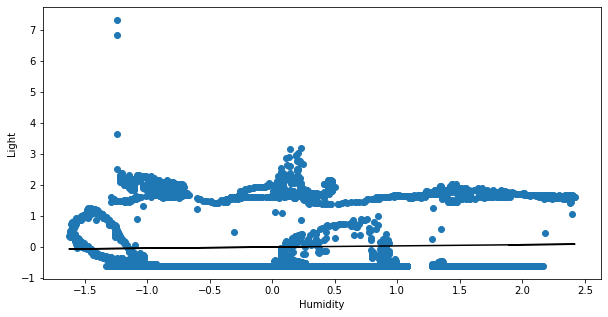

In [183]:
y_pred = reg.predict(df[[to_use]])
plt.figure(figsize=(10,5))
plt.style.context('ggplot')
plt.xlabel(to_use)
plt.ylabel(to_find)
plt.scatter(df[to_use], df[to_find])
plt.plot(df[[to_use]], y_pred, color = 'black')

In [149]:
len(y_pred)

8143

In [131]:
options = ['Temperature', 'Humidity', 'Light','CO2', 'HumidityRatio']

I got itertools from here https://stackoverflow.com/questions/464864/how-to-get-all-possible-combinations-of-a-list-s-elements

In [136]:
import itertools

for first , second in itertools.combinations(options,2):
    print(first, second)

Humidity Light
Humidity CO2
Humidity HumidityRatio
Light CO2
Light HumidityRatio
CO2 HumidityRatio


========Results of LinearRegression============


Exception: Data must be 1-dimensional

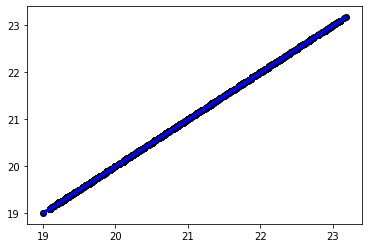

In [43]:
## Linear Regression in 2 dimensions

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error #this are need to get the results

reg = [("LinearRegression",LinearRegression()), ("Lasso", Lasso()), ("Ridge",Ridge())]

df_report = pd.DataFrame(columns=["Model",'R2', 'MSE', 'MAE', 'Coefficients','Intercept'])


#y_test = X_test.T[0].reshape(-1, 1)
#y_train = X_train.T[0].reshape(-1, 1)

for name, reg in reg:
    
    print("========Results of {}============".format(name))
    reg.fit(X_train.T[0].reshape(-1, 1), y_train)
    y_pred = reg.predict(X_test.T[0].reshape(-1, 1))
    """
    print('R2: %.3f' % r2_score(y_test, y_pred))
    print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
    print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))
    
    #this is the parameters that define how the line will look
    print('Coefficients: ', reg.coef_)
    print('Intercept: ', reg.intercept_)
    """
    plt.scatter(X_test.T[0], y_test,  color='black')
    plt.plot(X_test.T[0], y_pred, color='blue', linewidth=3)
    df_report["Model"] = name
    df_report['R2'] = r2_score(y_test, y_pred)
    df_report['MSE'] = mean_squared_error(y_test, y_pred)
    df_report['MAE'] = mean_absolute_error(y_test, y_pred)
    df_report['Coefficients'] = reg.coef_
    df_report['Intercept'] = reg.intercept_
    df_report = pd.concat([df_report, df_report], axis=0, ignore_index=True )
    
    plt.show()

In [41]:
df_report

,Model,R2,MSE,MAE,Coefficients,Intercept


In [ ]:
# for saving charts

file_name = "/Users/piyush2017/Downloads/" + name_of_model + "_ROC_curve_" + num + ".png"
       plt.savefig(file_name)

In [17]:
name_of_model = "Linear Regression"




# X_train.T[0].reshape(-1, 1)## Linear Regression in 2 dimensions

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error #this are need to get the results

reg = [("LinearRegression",LinearRegression()), ("Lasso", Lasso()), ("Ridge",Ridge())]

df_report = pd.DataFrame(columns=["Model",'R2', 'MSE', 'MAE', 'Coefficients','Intercept'])


# y_test = X_test.T[1].reshape(-1, 1)
# y_train = X_train.T[1]

for name, reg in reg:
    
    print("========Results of {}============".format(name))
    reg.fit(X_train.T[0].reshape(-1, 1), y_train)
    y_pred = reg.predict(X_test.T[0].reshape(-1, 1))
    
    print('R2: %.3f' % r2_score(y_test, y_pred))
    print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
    print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))
    
    #this is the parameters that define how the line will look
    print('Coefficients: ', reg.coef_)
    print('Intercept: ', reg.intercept_)
    
    plt.scatter(X_test.T[0], y_test,  color='black')
    plt.plot(X_test.T[0], y_pred, color='blue', linewidth=3)
    df_report["Model"] = name
    df_report['R2'] = r2_score(y_test, y_pred)
    df_report['MSE'] = mean_squared_error(y_test, y_pred)
    df_report['MAE'] = mean_absolute_error(y_test, y_pred)
    df_report['Coefficients'] = reg.coef_
    df_report['Intercept'] = reg.intercept_
    df_report = pd.concat([df_report, df_report], axis=1)
    file_name = "/Users/piyush2017/Downloads/" + name_of_model + "_chart_" + name + ".png"

    plt.savefig(file_name)
    plt.show()

========Results of LinearRegression============


KeyError: 0

# Lasso

In [31]:
reg = Lasso()
reg.fit(X_train.T[0].reshape(-1, 1), y_train)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

KeyError: 0

In [32]:
y_pred = reg.predict(X_test.T[0].reshape(-1, 1))
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: -0.000
MSE: 0.167
MAE: 0.335


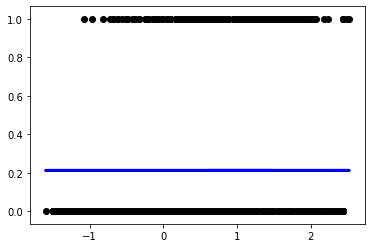

In [33]:
plt.scatter(X_test.T[0], y_test,  color='black')
plt.plot(X_test.T[0], y_pred, color='blue', linewidth=3)
plt.show()

# Ridge

In [28]:
reg = Ridge()
reg.fit(X_train.T[0].reshape(-1, 1), y_train)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [0.22086346]
Intercept: 
 0.213699038732899


In [29]:
y_pred = reg.predict(X_test.T[0].reshape(-1, 1))
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.292
MSE: 0.119
MAE: 0.262


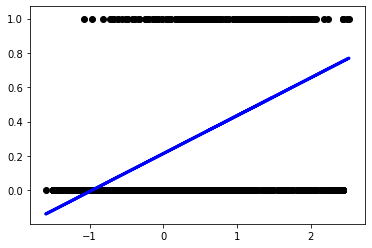

In [30]:
plt.scatter(X_test.T[0], y_test,  color='black')
plt.plot(X_test.T[0], y_pred, color='blue', linewidth=3)
plt.show()

# Logistic Regression with preprocced data

In [15]:
df = pd.read_csv('/Users/piyush2017/Code/2020_Data_Mining_Project_02/data_mining_2020_project_occupancy_detection/data/preprocessdatatrainingcopy.csv')

In [16]:
selected_columns = ['CO2']
class_name = "Occupancy"
attributes = [col for col in df.columns if col != class_name]
X = df[selected_columns].values
y = df[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)


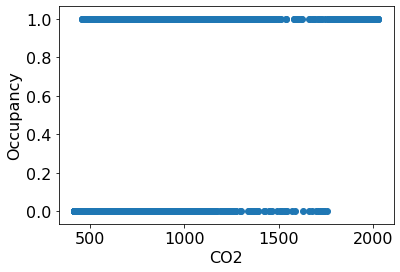

In [17]:
plt.scatter(X_train, y_train)
plt.xlabel(selected_columns[0], fontsize=16)
plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.904625460499386
F1-score [0.94063694 0.75754422]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1924
           1       0.82      0.70      0.76       519

    accuracy                           0.90      2443
   macro avg       0.87      0.83      0.85      2443
weighted avg       0.90      0.90      0.90      2443



In [21]:
from scipy.special import expit

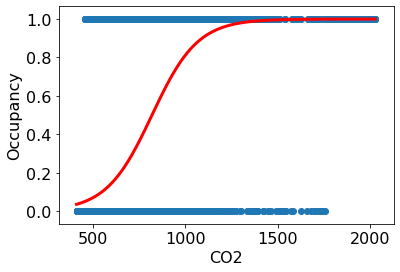

In [22]:
loss = expit(sorted(X_test) * clf.coef_ + clf.intercept_).ravel()
plt.plot(sorted(X_test), loss, color='red', linewidth=3)
plt.scatter(X_train, y_train)
plt.xlabel(selected_columns[0], fontsize=16)
plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [23]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

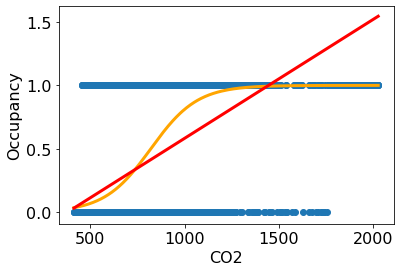

In [24]:
plt.scatter(X_train, y_train)

loss = expit(sorted(X_test) * clf.coef_ + clf.intercept_).ravel()
plt.plot(sorted(X_test), loss, color='orange', linewidth=3)

plt.plot(sorted(X_test), reg.coef_ * sorted(X_test) + reg.intercept_, color='red', linewidth=3)


plt.xlabel(selected_columns[0], fontsize=16)
plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

# Logistic Regression

https://realpython.com/logistic-regression-python/

Here I am doing exprement first with only CO2 and testing the result and then later with CO2 and Light

# Theory

Logistic regression is a fundamental classification technique. It belongs to the group of linear classifiers

In [25]:
def getting_data_ready():

    # for loading all the data
    df = pd.read_csv('/Users/piyush2017/Code/2020_Data_Mining_Project_02/data_mining_2020_project_occupancy_detection/data/scaled_datatrainingcopy.csv')
    df_test1 = pd.read_csv('/Users/piyush2017/Code/2020_Data_Mining_Project_02/data_mining_2020_project_occupancy_detection/data/scaled_datatestcopy.csv')
    df_test2 = pd.read_csv('/Users/piyush2017/Code/2020_Data_Mining_Project_02/data_mining_2020_project_occupancy_detection/data/scaled_datatest2copy.csv')

    class_name = "Occupancy"
    selected_columns = ['CO2']
    
    #attributes = [col for col in df.columns if col != class_name]
    X = df[selected_columns].values
    y = df[class_name]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

    #attributes = [col for col in df.columns if col != class_name]
    X_test1 = df_test1[selected_columns].values
    y_test1 = df_test1[class_name]


    #attributes = [col for col in df.columns if col != class_name]
    X_test2 = df_test2[selected_columns].values
    y_test2 = df_test2[class_name]
    
    
    return X_train, X_test, y_train, y_test, X_test1, y_test1, X_test2, y_test2

In [26]:
X_train, X_test, y_train, y_test, X_test1, y_test1, X_test2, y_test2 = getting_data_ready()

# this is list to be used in testing automation

tests = [("Training", X_test,y_test),("Test_1", X_test1,y_test1),
         ("Test_2", X_test2, y_test2)]




In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
def show_report(tests):
    for num, test, results in tests:

        y_pred = clf.predict(test)
        print('\n ===============Results for {} ================== \n'.format(num))
        print('Accuracy %s' % accuracy_score(results, y_pred))
        print('F1-score %s' % f1_score(results, y_pred, average=None))
        print(classification_report(results, y_pred))
        y_score = clf.predict_proba(test)
        plot_roc(results, y_score)
        plot_lift_curve(results, y_score)
        
        plt.show()


 ===============Results for Training ================== 

Accuracy 0.9038067949242734
F1-score [0.94015788 0.75495308]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1924
           1       0.82      0.70      0.75       519

    accuracy                           0.90      2443
   macro avg       0.87      0.83      0.85      2443
weighted avg       0.90      0.90      0.90      2443



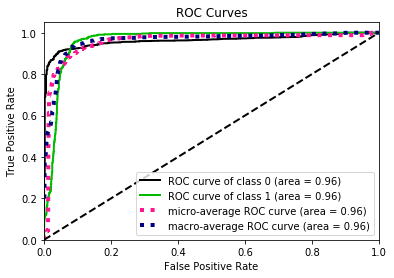

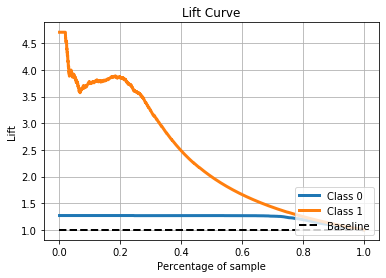


 ===============Results for Test_1 ================== 

Accuracy 0.851782363977486
F1-score [0.89061202 0.77021524]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      1693
           1       0.89      0.68      0.77       972

    accuracy                           0.85      2665
   macro avg       0.86      0.82      0.83      2665
weighted avg       0.86      0.85      0.85      2665



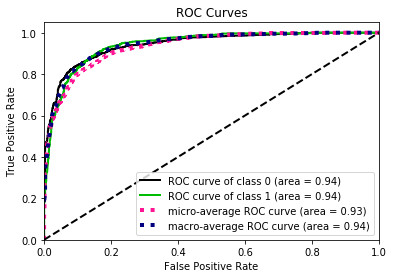

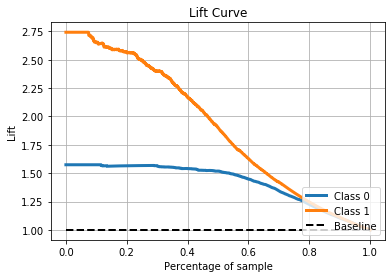


 ===============Results for Test_2 ================== 

Accuracy 0.7708162428219852
F1-score [0.85792384 0.40763318]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      7703
           1       0.45      0.38      0.41      2049

    accuracy                           0.77      9752
   macro avg       0.64      0.63      0.63      9752
weighted avg       0.76      0.77      0.76      9752



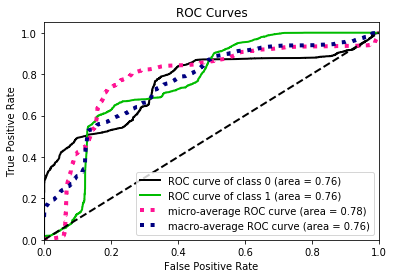

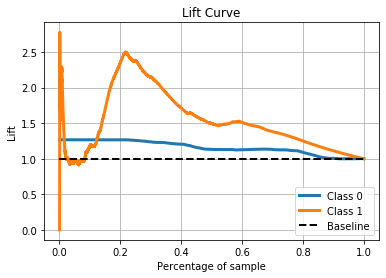

In [30]:
show_report(tests)

In [31]:
df_report = pd.DataFrame()

for num, test, results in tests:
    
    y_pred = clf.predict(test)
    results = pd.DataFrame(classification_report(results, y_pred, output_dict=True))
    print(results.T)
    df_report = pd.concat([df_report, results.T], axis=1 )

              precision    recall  f1-score      support
0              0.921618  0.959459  0.940158  1924.000000
1              0.822727  0.697495  0.754953   519.000000
accuracy       0.903807  0.903807  0.903807     0.903807
macro avg      0.872172  0.828477  0.847555  2443.000000
weighted avg   0.900609  0.903807  0.900812  2443.000000
              precision    recall  f1-score      support
0              0.838373  0.949793  0.890612  1693.000000
1              0.886212  0.681070  0.770215   972.000000
accuracy       0.851782  0.851782  0.851782     0.851782
macro avg      0.862292  0.815432  0.830414  2665.000000
weighted avg   0.855821  0.851782  0.846700  2665.000000
              precision    recall  f1-score      support
0              0.840558  0.876022  0.857924  7703.000000
1              0.446056  0.375305  0.407633  2049.000000
accuracy       0.770816  0.770816  0.770816     0.770816
macro avg      0.643307  0.625664  0.632779  9752.000000
weighted avg   0.757669  0.7708

In [32]:
path_to_save_results = "/Users/piyush2017/Downloads/"

In [33]:
# this code will delete unwanted things

try:
    df_report.drop(['support'], axis=1, inplace=True)
    df_report.drop(['macro avg','weighted avg'], axis=0,inplace=True)

except:
    pass 

file_name = path_to_save_results + "res.xlsx"

df_report.to_excel(file_name)
df_report.head(5)

,precision,recall,f1-score,precision,recall,f1-score,precision,recall,f1-score
0,0.921618,0.959459,0.940158,0.838373,0.949793,0.890612,0.840558,0.876022,0.857924
1,0.822727,0.697495,0.754953,0.886212,0.681070,0.770215,0.446056,0.375305,0.407633
accuracy,0.903807,0.903807,0.903807,0.851782,0.851782,0.851782,0.770816,0.770816,0.770816


In [204]:
def get_every_thing(to_use, to_find):
    reg = LinearRegression() 
    reg.fit(df[[to_use]], df[to_find])
    y_pred = reg.predict(df[[to_use]])
    plt.style.context('ggplot')
    plt.xlabel(to_use)
    plt.ylabel(to_find)
    plt.scatter(df[to_use], df[to_find])
    plt.plot(df[[to_use]], y_pred, color = 'black')
    plt.show()
    
    # to get the numerical attribute

    print('R2: %.3f' % r2_score(df[to_find], y_pred))
    print('MSE: %.3f' % mean_squared_error(df[to_find], y_pred))
    print('MAE: %.3f' % mean_absolute_error(df[to_find], y_pred))
    
    # to get two remaing values
    print('Coefficients: ', reg.coef_)
    print('Intercept: ', reg.intercept_)

Humidity Light


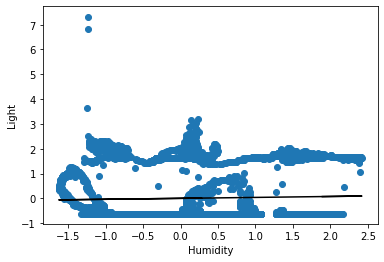

R2: 0.001
MSE: 0.999
MAE: 0.855
Coefficients:  [0.03782794]
Intercept:  2.0457876361568231e-10
Humidity CO2


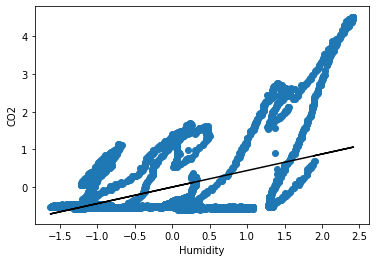

R2: 0.193
MSE: 0.807
MAE: 0.667
Coefficients:  [0.43902276]
Intercept:  7.47911210756064e-12
Humidity HumidityRatio


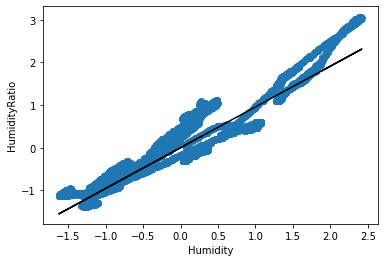

R2: 0.912
MSE: 0.088
MAE: 0.243
Coefficients:  [0.95519808]
Intercept:  2.048950313964884e-11
Light CO2


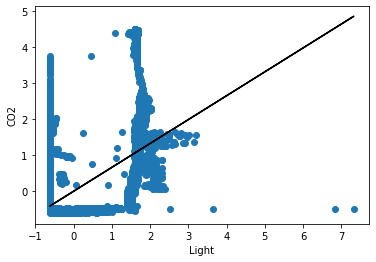

R2: 0.441
MSE: 0.559
MAE: 0.409
Coefficients:  [0.66402206]
Intercept:  -1.3761665285580049e-10
Light HumidityRatio


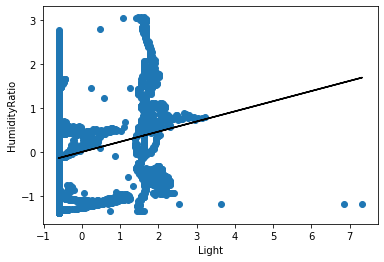

R2: 0.053
MSE: 0.947
MAE: 0.788
Coefficients:  [0.23042021]
Intercept:  -4.7803892025095306e-11
CO2 HumidityRatio


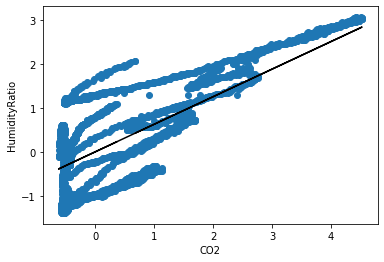

R2: 0.393
MSE: 0.607
MAE: 0.666
Coefficients:  [0.6265559]
Intercept:  6.022889670660005e-13


In [205]:
for first , second in itertools.combinations(options,2):
    print(first, second)
    get_every_thing(first, second)

In [34]:
### trying to do all the three 

In [97]:
def getting_data_ready():

    # for loading all the data
    df = pd.read_csv('/Users/piyush2017/Code/2020_Data_Mining_Project_02/data_mining_2020_project_occupancy_detection/data/scaled_datatrainingcopy.csv')
    df_test1 = pd.read_csv('/Users/piyush2017/Code/2020_Data_Mining_Project_02/data_mining_2020_project_occupancy_detection/data/scaled_datatestcopy.csv')
    df_test2 = pd.read_csv('/Users/piyush2017/Code/2020_Data_Mining_Project_02/data_mining_2020_project_occupancy_detection/data/scaled_datatest2copy.csv')

    class_name = "Occupancy"
    selected_columns = ['CO2','Light']
    
    #attributes = [col for col in df.columns if col != class_name]
    X = df[selected_columns].values
    y = df[class_name]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

    #attributes = [col for col in df.columns if col != class_name]
    X_test1 = df_test1[selected_columns].values
    y_test1 = df_test1[class_name]


    #attributes = [col for col in df.columns if col != class_name]
    X_test2 = df_test2[selected_columns].values
    y_test2 = df_test2[class_name]
    
    
    return X_train, X_test, y_train, y_test, X_test1, y_test1, X_test2, y_test2

In [98]:
X_train, X_test, y_train, y_test, X_test1, y_test1, X_test2, y_test2 = getting_data_ready()

# this is list to be used in testing automation

tests = [("Training", X_test,y_test),("Test_1", X_test1,y_test1),
         ("Test_2", X_test2, y_test2)]




In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
name_of_model = "LogisticRegression"

def show_report_chart_lift(tests):
    for num, test, results in tests:

        y_pred = clf.predict(test)
        y_score = clf.predict_proba(test)
        plot_lift_curve(results, y_score)
        file_name = "/Users/piyush2017/Downloads/" + name_of_model + "_lift_curve_" + num + ".png"
        plt.savefig(file_name)
        plt.show()
        
def show_report_chart_roc(tests):
    for num, test, results in tests:

        y_pred = clf.predict(test)
        y_score = clf.predict_proba(test)
        plot_roc(results, y_score)
        file_name = "/Users/piyush2017/Downloads/" + name_of_model + "_ROC_curve_" + num + ".png"
        plt.savefig(file_name)
        plt.show()

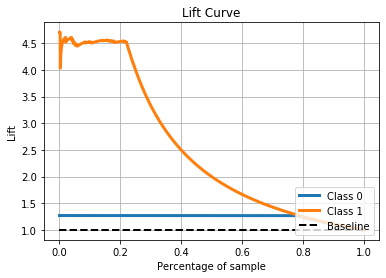

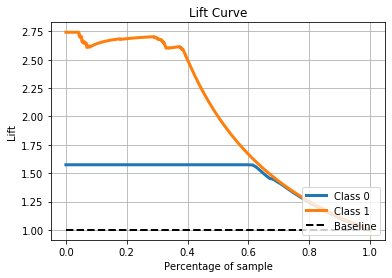

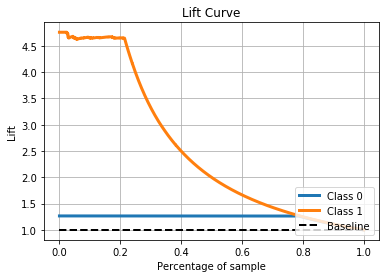

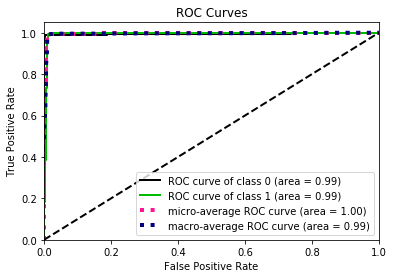

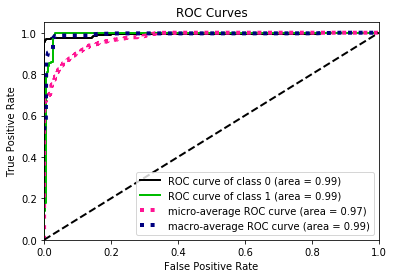

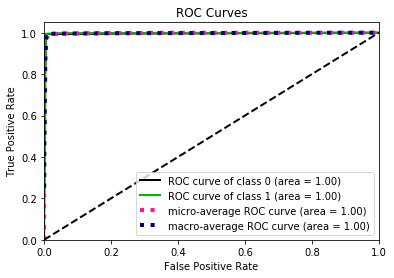

In [40]:
show_report_chart_lift(tests)
show_report_chart_roc(tests)

In [45]:
df_report = pd.DataFrame()

for num, test, results in tests:
    
    y_pred = clf.predict(test)
    results = pd.DataFrame(classification_report(results, y_pred, output_dict=True))
    print(results.T)
    df_report = pd.concat([df_report, results.T], axis=1 )

              precision    recall  f1-score      support
0              0.998425  0.988565  0.993471  1924.000000
1              0.959108  0.994220  0.976348   519.000000
accuracy       0.989767  0.989767  0.989767     0.989767
macro avg      0.978767  0.991393  0.984910  2443.000000
weighted avg   0.990072  0.989767  0.989833  2443.000000
              precision    recall  f1-score      support
0              0.870150  0.993503  0.927744  1693.000000
1              0.984973  0.741770  0.846244   972.000000
accuracy       0.901689  0.901689  0.901689     0.901689
macro avg      0.927561  0.867636  0.886994  2665.000000
weighted avg   0.912029  0.901689  0.898019  2665.000000
              precision    recall  f1-score      support
0              0.990300  0.994028  0.992161  7703.000000
1              0.977228  0.963397  0.970263  2049.000000
accuracy       0.987592  0.987592  0.987592     0.987592
macro avg      0.983764  0.978713  0.981212  9752.000000
weighted avg   0.987553  0.9875

In [ ]:
# this code will delete unwanted things

df_report.drop(['support'], axis=1, inplace=True)
df_report.drop(['macro avg','weighted avg'], axis=0,inplace=True)

df_report.to_excel('/Users/piyush2017/Downloads/res.xlsx')
df_report.head(5)

In [42]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

[[1902   22]
 [   3  516]]


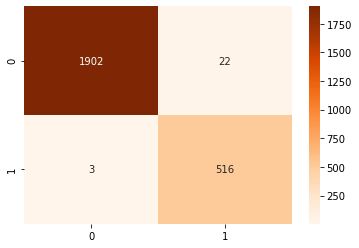

In [44]:
y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=None, sample_weight=None, normalize=None)

print(cm)

sns.heatmap(cm, annot=True,fmt="d",cmap='Oranges')

## Trying with all the atributes

In [101]:
def getting_data_ready():

    # for loading all the data
    df = pd.read_csv('/Users/piyush2017/Code/2020_Data_Mining_Project_02/data_mining_2020_project_occupancy_detection/data/scaled_datatrainingcopy.csv')
    df_test1 = pd.read_csv('/Users/piyush2017/Code/2020_Data_Mining_Project_02/data_mining_2020_project_occupancy_detection/data/scaled_datatestcopy.csv')
    df_test2 = pd.read_csv('/Users/piyush2017/Code/2020_Data_Mining_Project_02/data_mining_2020_project_occupancy_detection/data/scaled_datatest2copy.csv')

    class_name = "Occupancy"
    selected_columns = ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']
    
    #attributes = [col for col in df.columns if col != class_name]
    X = df[selected_columns]
    y = df[class_name]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

    #attributes = [col for col in df.columns if col != class_name]
    X_test1 = df_test1[selected_columns].values
    y_test1 = df_test1[class_name]


    #attributes = [col for col in df.columns if col != class_name]
    X_test2 = df_test2[selected_columns].values
    y_test2 = df_test2[class_name]
    
    
    return X_train, X_test, y_train, y_test, X_test1, y_test1, X_test2, y_test2

In [102]:
X_train, X_test, y_train, y_test, X_test1, y_test1, X_test2, y_test2 = getting_data_ready()

# this is list to be used in testing automation

tests = [("Training", X_test,y_test),("Test_1", X_test1,y_test1),
         ("Test_2", X_test2, y_test2)]




In [107]:
from sklearn.linear_model import LogisticRegression

In [49]:
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
def show_report(tests):
    for num, test, results in tests:

        y_pred = clf.predict(test)
        print('\n ===============Results for {} ================== \n'.format(num))
        print('Accuracy %s' % accuracy_score(results, y_pred))
        print('F1-score %s' % f1_score(results, y_pred, average=None))
        print(classification_report(results, y_pred))
        y_score = clf.predict_proba(test)
        plot_roc(results, y_score)
        plot_lift_curve(results, y_score)
        
        plt.show()


 ===============Results for Training ================== 

Accuracy 0.9881293491608678
F1-score [0.99243412 0.97245964]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1924
           1       0.96      0.99      0.97       519

    accuracy                           0.99      2443
   macro avg       0.98      0.99      0.98      2443
weighted avg       0.99      0.99      0.99      2443



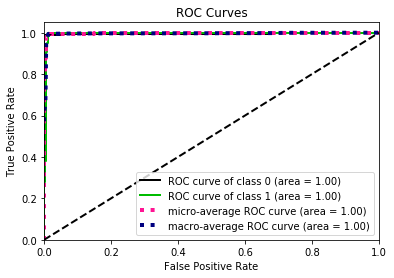

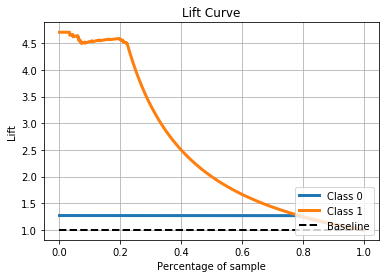


 ===============Results for Test_1 ================== 

Accuracy 0.8930581613508443
F1-score [0.92142266 0.83264827]
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1693
           1       0.97      0.73      0.83       972

    accuracy                           0.89      2665
   macro avg       0.92      0.86      0.88      2665
weighted avg       0.90      0.89      0.89      2665



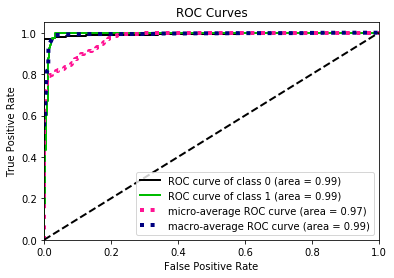

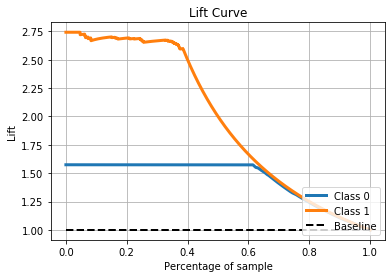


 ===============Results for Test_2 ================== 

Accuracy 0.9552912223133716
F1-score [0.97227521 0.88459502]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      7703
           1       0.97      0.82      0.88      2049

    accuracy                           0.96      9752
   macro avg       0.96      0.90      0.93      9752
weighted avg       0.96      0.96      0.95      9752



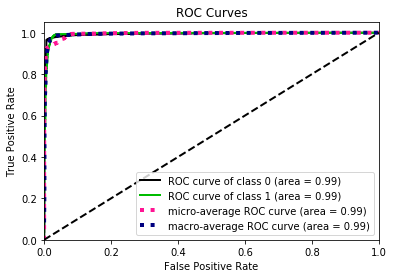

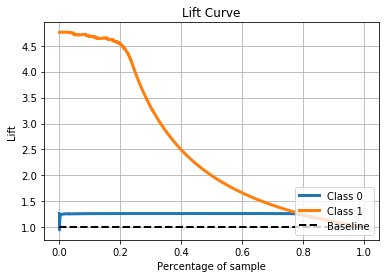

In [51]:
show_report(tests)

In [52]:
df_report = pd.DataFrame()

for num, test, results in tests:
    
    y_pred = clf.predict(test)
    results = pd.DataFrame(classification_report(results, y_pred, output_dict=True))
    print(results.T)
    df_report = pd.concat([df_report, results.T], axis=1 )

              precision    recall  f1-score      support
0              0.996333  0.988565  0.992434  1924.000000
1              0.958801  0.986513  0.972460   519.000000
accuracy       0.988129  0.988129  0.988129     0.988129
macro avg      0.977567  0.987539  0.982447  2443.000000
weighted avg   0.988360  0.988129  0.988191  2443.000000
              precision    recall  f1-score      support
0              0.864012  0.987005  0.921423  1693.000000
1              0.969904  0.729424  0.832648   972.000000
accuracy       0.893058  0.893058  0.893058     0.893058
macro avg      0.916958  0.858215  0.877035  2665.000000
weighted avg   0.902634  0.893058  0.889044  2665.000000
              precision    recall  f1-score      support
0              0.952885  0.992470  0.972275  7703.000000
1              0.966455  0.815520  0.884595  2049.000000
accuracy       0.955291  0.955291  0.955291     0.955291
macro avg      0.959670  0.903995  0.928435  9752.000000
weighted avg   0.955736  0.9552

In [55]:
path_to_save_results = "/Users/piyush2017/Desktop/"

In [56]:
# this code will delete unwanted things

try:
    df_report.drop(['support'], axis=1, inplace=True)
    df_report.drop(['macro avg','weighted avg'], axis=0,inplace=True)

except:
    pass 

file_name = path_to_save_results + "res.xlsx"

df_report.to_excel(file_name)
df_report.head(5)

,precision,recall,f1-score,precision,recall,f1-score,precision,recall,f1-score
0,0.996333,0.988565,0.992434,0.864012,0.987005,0.921423,0.952885,0.992470,0.972275
1,0.958801,0.986513,0.972460,0.969904,0.729424,0.832648,0.966455,0.815520,0.884595
accuracy,0.988129,0.988129,0.988129,0.893058,0.893058,0.893058,0.955291,0.955291,0.955291


In [57]:
name_of_model = "LogisticRegression"

def show_report_chart_lift(tests):
    for num, test, results in tests:

        y_pred = clf.predict(test)
        y_score = clf.predict_proba(test)
        plot_lift_curve(results, y_score)
        file_name = "/Users/piyush2017/Downloads/" + name_of_model + "_lift_curve_" + num + ".png"
        plt.savefig(file_name)
        plt.show()
        
def show_report_chart_roc(tests):
    for num, test, results in tests:

        y_pred = clf.predict(test)
        y_score = clf.predict_proba(test)
        plot_roc(results, y_score)
        file_name = "/Users/piyush2017/Downloads/" + name_of_model + "_ROC_curve_" + num + ".png"
        plt.savefig(file_name)
        plt.show()

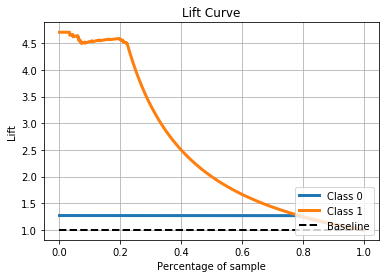

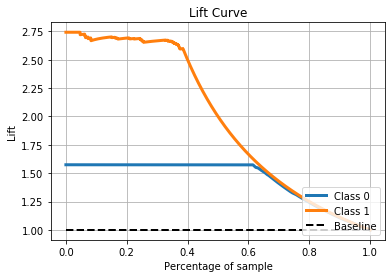

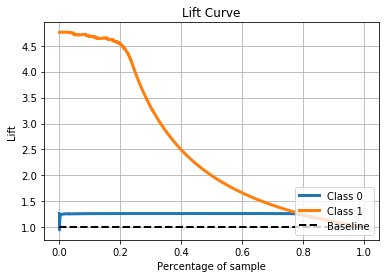

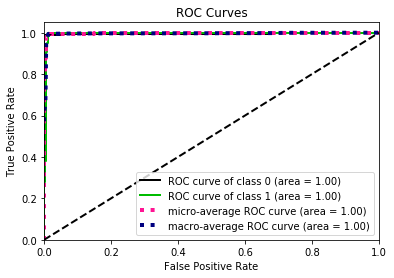

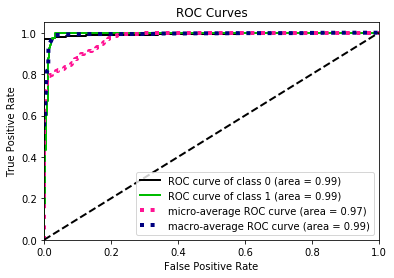

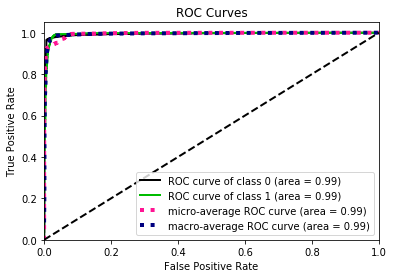

In [58]:
show_report_chart_lift(tests)
show_report_chart_roc(tests)

In [45]:
df_report = pd.DataFrame(columns=["Model",'R2', 'MSE', 'MAE', 'Coefficients','Intercept'])

In [46]:
df_report

,Model,R2,MSE,MAE,Coefficients,Intercept


In [118]:
def getting_data_ready():

    # for loading all the data
    df = pd.read_csv('/Users/piyush2017/Code/2020_Data_Mining_Project_02/data_mining_2020_project_occupancy_detection/data/scaled_datatrainingcopy.csv')
    df_test1 = pd.read_csv('/Users/piyush2017/Code/2020_Data_Mining_Project_02/data_mining_2020_project_occupancy_detection/data/scaled_datatestcopy.csv')
    df_test2 = pd.read_csv('/Users/piyush2017/Code/2020_Data_Mining_Project_02/data_mining_2020_project_occupancy_detection/data/scaled_datatest2copy.csv')

    class_name = "Occupancy"
    selected_columns = ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio', 'Week_day']
    
    #attributes = [col for col in df.columns if col != class_name]
    X = df[selected_columns]
    y = df[class_name]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

    #attributes = [col for col in df.columns if col != class_name]
    X_test1 = df_test1[selected_columns].values
    y_test1 = df_test1[class_name]


    #attributes = [col for col in df.columns if col != class_name]
    X_test2 = df_test2[selected_columns].values
    y_test2 = df_test2[class_name]
    
    
    return X_train, X_test, y_train, y_test, X_test1, y_test1, X_test2, y_test2

In [119]:
X_train, X_test, y_train, y_test, X_test1, y_test1, X_test2, y_test2 = getting_data_ready()

# this is list to be used in testing automation

tests = [("Training", X_test,y_test),("Test_1", X_test1,y_test1),
         ("Test_2", X_test2, y_test2)]




In [120]:
clf = reg = Ridge()
clf.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

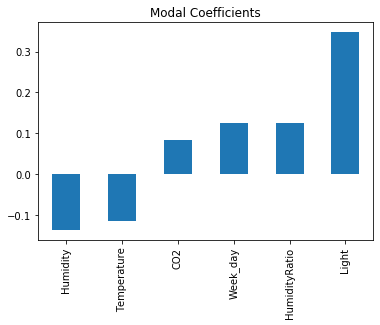

In [121]:
#checking the magnitude of coefficients

predictors = X_train.columns

coef = pd.Series(clf.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Modal Coefficients')



In [122]:
clf = reg = Lasso()
clf.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

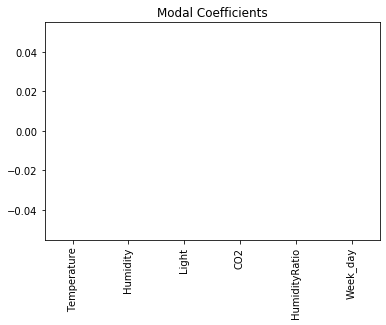

In [123]:
#checking the magnitude of coefficients

predictors = X_train.columns

coef = pd.Series(clf.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Modal Coefficients')




In [116]:
df = pd.read_csv('/Users/piyush2017/Code/2020_Data_Mining_Project_02/data_mining_2020_project_occupancy_detection/data/scaled_datatrainingcopy.csv')

In [117]:
df.columns

Index(['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio', 'Week_day',
       'Occupancy'],
      dtype='object')

In [133]:
col = list(df.columns)

In [134]:
col

['Temperature',
 'Humidity',
 'Light',
 'CO2',
 'HumidityRatio',
 'Week_day',
 'Occupancy']

In [148]:
for i in col:
    
    col2 = [x for x in col if x != i]
    for j in col2:
        print(i,j)

Humidity Light
Humidity CO2
Humidity HumidityRatio
Humidity Week_day
Humidity Occupancy
Light Humidity
Light CO2
Light HumidityRatio
Light Week_day
Light Occupancy
CO2 Humidity
CO2 Light
CO2 HumidityRatio
CO2 Week_day
CO2 Occupancy
HumidityRatio Humidity
HumidityRatio Light
HumidityRatio CO2
HumidityRatio Week_day
HumidityRatio Occupancy
Week_day Humidity
Week_day Light
Week_day CO2
Week_day HumidityRatio
Week_day Occupancy
Occupancy Humidity
Occupancy Light
Occupancy CO2
Occupancy HumidityRatio
Occupancy Week_day


In [138]:
ij = 'Light'

In [139]:
print([if x is not ij for x in col]) 

SyntaxError: invalid syntax (<ipython-input-139-d31ad57e1b65>, line 1)

In [146]:
print([x for x in col if x != 'Light'])

['Humidity', 'CO2', 'HumidityRatio', 'Week_day', 'Occupancy']


# trying to put results in a doc

In [197]:
# all this code is to start the document 

from docx import Document
from docx.shared import Inches

document = Document()

document.add_heading('Linear Regression', 0)

p = document.add_paragraph('Here we are trying to find what will be the result of trying diffent combinations of features. ')

# p.add_run('bold').bold = True
# p.add_run(' and some ')
# p.add_run('italic.').italic = True

In [198]:
def get_every_thing(to_use, to_find):
    reg = LinearRegression() 
    reg.fit(df[[to_use]], df[to_find])
    y_pred = reg.predict(df[[to_use]])
    plt.figure(figsize=(10,5))
    plt.style.context('ggplot')
    plt.xlabel(to_use)
    plt.ylabel(to_find)
    plt.scatter(df[to_use], df[to_find])
    plt.plot(df[[to_use]], y_pred, color = 'black')
    plt.savefig('monty-truth.png')
    plt.show()
    
    document.add_picture('monty-truth.png', width=Inches(4))
    
    # to get the numerical attribute
    
    document.add_paragraph(
    [str(('R2: %.3f' % r2_score(df[to_find], y_pred))),
    str(('MSE: %.3f' % mean_squared_error(df[to_find], y_pred))),
    str(('MAE: %.3f' % mean_absolute_error(df[to_find], y_pred)))],style='List Bullet'
)

#     document.add_page_break()
    
#     print('R2: %.3f' % r2_score(df[to_find], y_pred))
#     print('MSE: %.3f' % mean_squared_error(df[to_find], y_pred))
#     print('MAE: %.3f' % mean_absolute_error(df[to_find], y_pred))

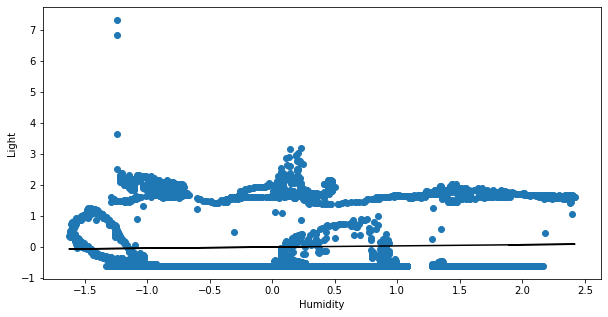

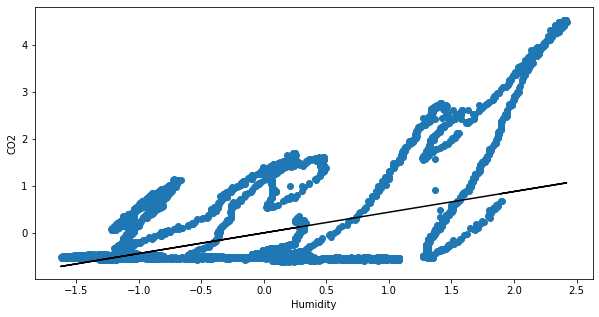

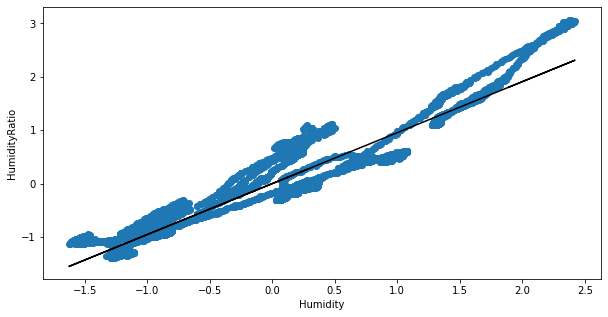

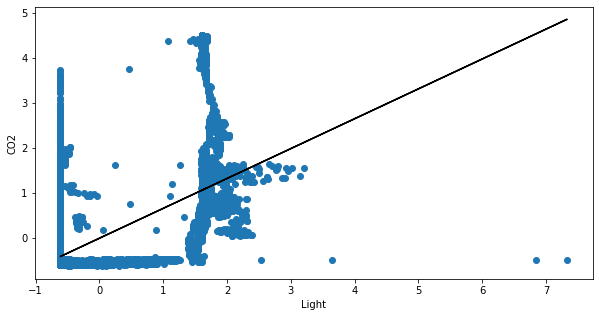

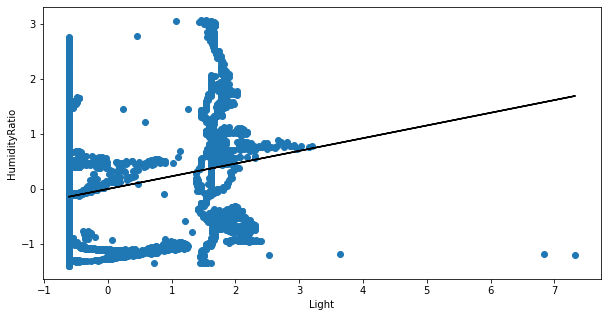

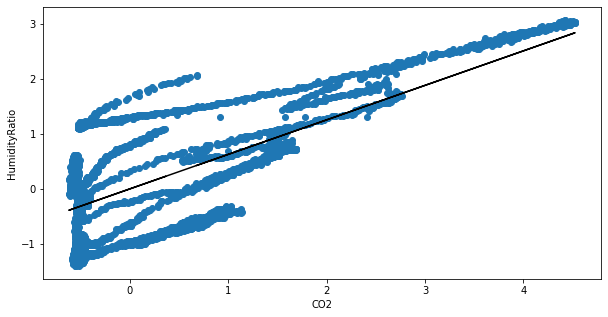

In [199]:
for first , second in itertools.combinations(options,2):
    
    document.add_heading("{} {}".format(first, second), level=1)
#     print(first, second)

    get_every_thing(first, second)
    
document.save('/Users/piyush2017/Downloads/LinearRegression.docx')

# _______________Don't touch it._____________________O

# adding table values together

In [211]:
# all this code is to start the document 

from docx import Document
from docx.shared import Inches

document = Document()

document.add_heading('Linear Regression', 0)

p = document.add_paragraph('Here we are trying to find what will be the result of trying diffent combinations of features. ')

# p.add_run('bold').bold = True
# p.add_run(' and some ')
# p.add_run('italic.').italic = True

In [212]:
def get_every_thing(to_use, to_find):
    reg = LinearRegression() 
    reg.fit(df[[to_use]], df[to_find])
    y_pred = reg.predict(df[[to_use]])
    plt.figure(figsize=(10,5))
    plt.style.context('ggplot')
    plt.xlabel(to_use)
    plt.ylabel(to_find)
    plt.scatter(df[to_use], df[to_find])
    plt.plot(df[[to_use]], y_pred, color = 'black')
    plt.savefig('monty-truth.png')
    plt.show()
    
    document.add_picture('monty-truth.png', width=Inches(4))
    
    # to get the numerical attribute
    
    r2 = r2_score(df[to_find], y_pred)
    mse = mean_squared_error(df[to_find], y_pred)
    mae = mean_absolute_error(df[to_find], y_pred)
    
    document.add_paragraph(
    [str(('R2: %.3f' % r2)),
    str(('MSE: %.3f' % mse)),
    str(('MAE: %.3f' % mae))],style='List Bullet'
)

#     document.add_page_break()
    
#     print('R2: %.3f' % r2_score(df[to_find], y_pred))
#     print('MSE: %.3f' % mean_squared_error(df[to_find], y_pred))
#     print('MAE: %.3f' % mean_absolute_error(df[to_find], y_pred))

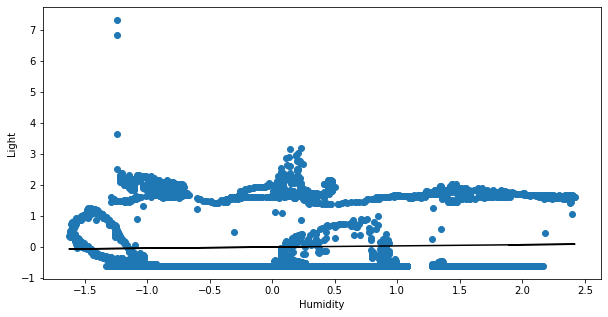

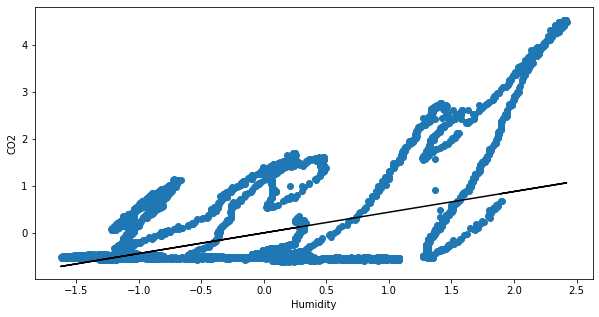

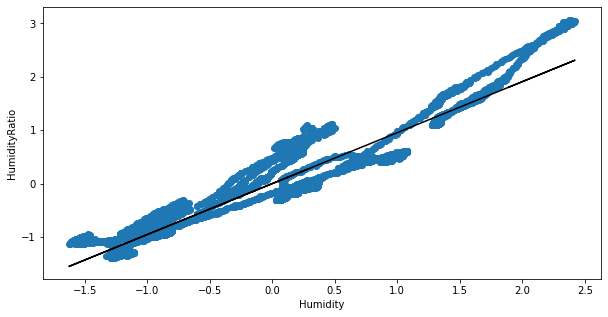

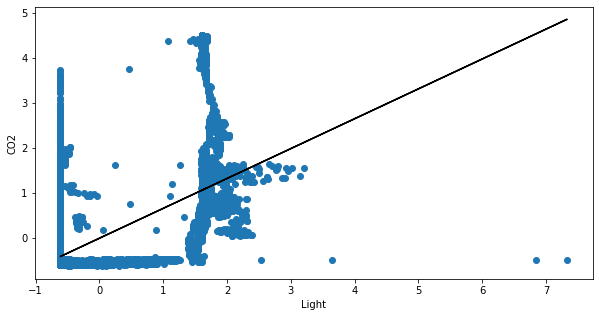

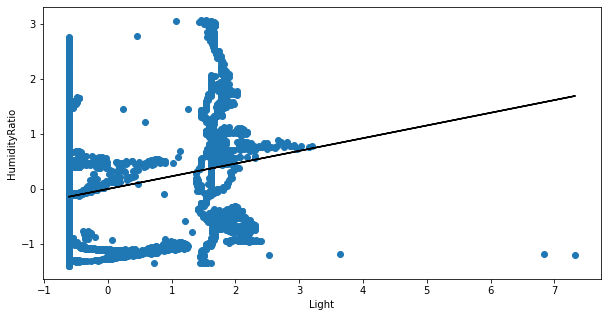

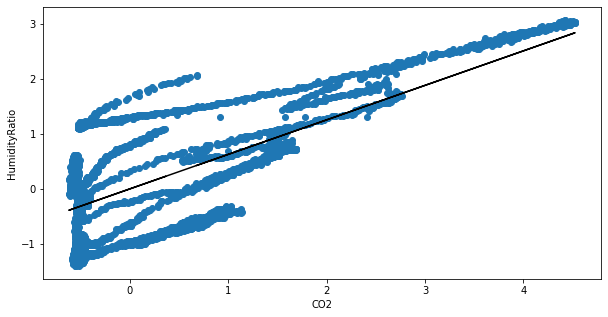

[] [] []


In [213]:
for first , second in itertools.combinations(options,2):
    
    document.add_heading("{} {}".format(first, second), level=1)
#     print(first, second)

    get_every_thing(first, second)

print(r2, mse, mae, end='\n')
    
document.save('/Users/piyush2017/Downloads/LinearRegression02.docx')

# ==============Don't touch it.================

In [276]:
theory = """
# R2:
### r-squared
The close to 1 it is the better then it says that the value us used for prediction is moving with the final value that you want.

https://www.investopedia.com/terms/r/r-squared.asp

# MSE: 
### mean squared error (MSE)
It calulate the distace of value from the mean:

An MSE of zero, meaning that the estimator <b> Z </b> predicts observations of the parameter <b> X </b>  with perfect accuracy, is the ideal, but is typically not possible.

https://en.wikipedia.org/wiki/Mean_squared_error

# MAE:
### mean absolute error (MAE)

It's basically the absolute error |x-x| so lower the value the better """

In [277]:
# all this code is to start the document 

from docx import Document
from docx.shared import Inches

document = Document()

document.add_heading('Linear Regression', 0)

p = document.add_paragraph('Here we are trying to find what will be the result of trying diffent combinations of features. ')

# p.add_run('bold').bold = True
# p.add_run(' and some ')
# p.add_run('italic.').italic = True

In [278]:
def get_every_thing(to_use, to_find):
    reg = LinearRegression() 
    reg.fit(df[[to_use]], df[to_find])
    y_pred = reg.predict(df[[to_use]])
    plt.figure(figsize=(10,5))
    plt.style.context('ggplot')
    plt.xlabel(to_use)
    plt.ylabel(to_find)
    plt.scatter(df[to_use], df[to_find])
    plt.plot(df[[to_use]], y_pred, color = 'black')
    plt.savefig('monty-truth.png')
    plt.show()
    
    
    document.add_picture('monty-truth.png', width=Inches(4))
    
    # to get the numerical attribute
    r = round(r2_score(df[to_find], y_pred), ndigits=3)
    s = round(mean_squared_error(df[to_find], y_pred), ndigits=3)
    a = round(mean_absolute_error(df[to_find], y_pred))
    
    r2.append(str(r))
    mse.append(str(s))
    mae.append(str(a))
    
    
    
    document.add_paragraph(
    [str(('R2: %.3f' % r)),
    str(('MSE: %.3f' % s)),
    str(('MAE: %.3f' % a))],style='List Bullet'
    )

#     document.add_page_break()
    
#     print('R2: %.3f' % r2_score(df[to_find], y_pred))
#     print('MSE: %.3f' % mean_squared_error(df[to_find], y_pred))
#     print('MAE: %.3f' % mean_absolute_error(df[to_find], y_pred))

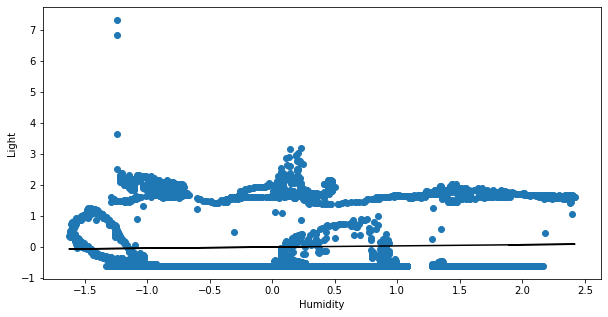

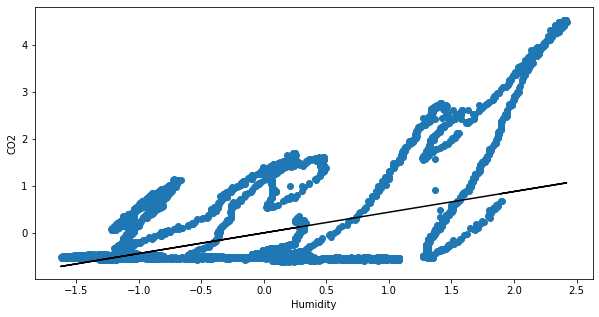

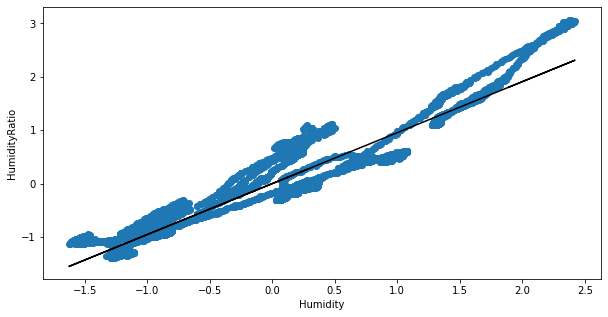

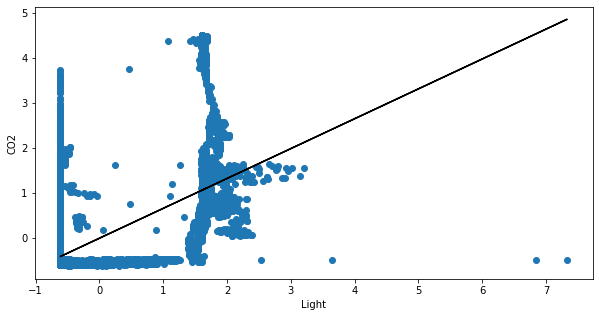

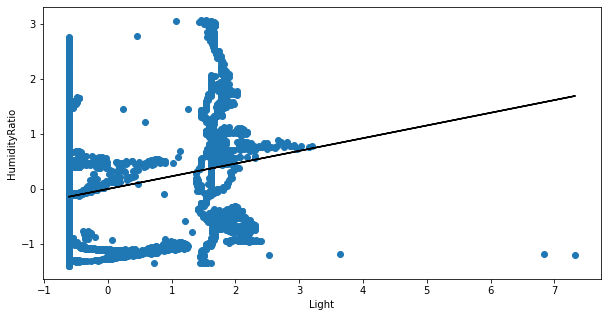

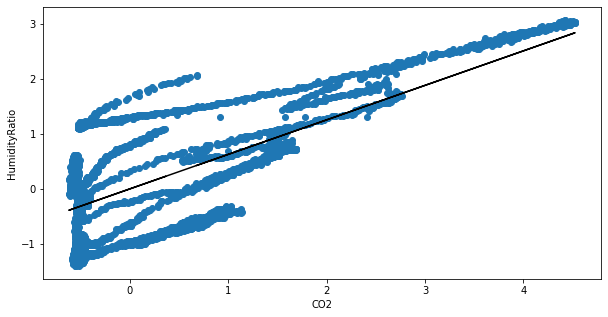

Humidity Light 0.001 0.999 1.0
Humidity CO2 0.193 0.807 1.0
Humidity HumidityRatio 0.912 0.088 0.0
Light CO2 0.441 0.559 0.0
Light HumidityRatio 0.053 0.947 1.0
CO2 HumidityRatio 0.393 0.607 1.0
['0.001', '0.193', '0.912', '0.441', '0.053', '0.393'] ['0.999', '0.807', '0.088', '0.559', '0.947', '0.607'] ['1.0', '1.0', '0.0', '0.0', '1.0', '1.0']


In [279]:
r2 = []
mse = []
mae = []
par = []


for first , second in itertools.combinations(options,2):
    
    document.add_heading("{} {}".format(first, second), level=1)
#     print(first, second)
    par.append("{} {}".format(first, second))
    get_every_thing(first, second)

document.add_page_break()
table = document.add_table(rows=1, cols=4)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Pair'
hdr_cells[1].text = 'R2'
hdr_cells[2].text = 'MSE'
hdr_cells[3].text = 'MAE'

for i in range(len(r2)):
    row_cells = table.add_row().cells
    row_cells[0].text = str(par[i])
    row_cells[1].text = r2[i]
    row_cells[2].text = mse[i]
    row_cells[3].text = mae[i]
    print(str(par[i]), str(r2[i]),str(mse[i]),str(mae[i]))
    
document.add_paragraph(theory)
    
print(r2, mse, mae, end='\n')
    
document.save('/Users/piyush2017/Downloads/LinearRegression03.docx')

In [280]:
reg = [("LinearRegression",LinearRegression()), ("Lasso", Lasso()), ("Ridge",Ridge())]
print(reg)

[('LinearRegression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)), ('Lasso', Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)), ('Ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001))]


In [275]:
print(theory)


# R2:
### r-squared
The close to 1 it is the better then it says that the value us used for prediction is moving with the final value that you want.

https://www.investopedia.com/terms/r/r-squared.asp

# MSE: 
### mean squared error (MSE)
It calulate the distace of value from the mean:

An MSE of zero, meaning that the estimator <b> Z </b> predicts observations of the parameter <b> X </b>  with perfect accuracy, is the ideal, but is typically not possible.

https://en.wikipedia.org/wiki/Mean_squared_error

# MAE:
### mean absolute error (MAE)

It's basically the absolute error |x-x| so lower the value the better 


# ==============Don't touch it.================

In [291]:
theory = """
# R2:
### r-squared
The close to 1 it is the better then it says that the value us used for prediction is moving with the final value that you want.

https://www.investopedia.com/terms/r/r-squared.asp

# MSE: 
### mean squared error (MSE)
It calulate the distace of value from the mean:

An MSE of zero, meaning that the estimator <b> Z </b> predicts observations of the parameter <b> X </b>  with perfect accuracy, is the ideal, but is typically not possible.

https://en.wikipedia.org/wiki/Mean_squared_error

# MAE:
### mean absolute error (MAE)

It's basically the absolute error |x-x| so lower the value the better """

In [304]:
# all this code is to start the document 

from docx import Document
from docx.shared import Inches

document = Document()

document.add_heading('Linear Regression', 0)

p = document.add_paragraph('Here we are trying to find what will be the result of trying diffent combinations of features. ')

# p.add_run('bold').bold = True
# p.add_run(' and some ')
# p.add_run('italic.').italic = True

In [305]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [306]:
reg = [("LinearRegression",LinearRegression()), ("Lasso", Lasso()), ("Ridge",Ridge())]
print(reg)

[('LinearRegression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)), ('Lasso', Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)), ('Ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001))]


In [307]:
def get_every_thing(to_use, to_find):
#     reg = LinearRegression() 
    reg.fit(df[[to_use]], df[to_find])
    y_pred = reg.predict(df[[to_use]])
    plt.figure(figsize=(10,5))
    plt.style.context('ggplot')
    plt.xlabel(to_use)
    plt.ylabel(to_find)
    plt.scatter(df[to_use], df[to_find])
    plt.plot(df[[to_use]], y_pred, color = 'black')
    plt.savefig('monty-truth.png')
    #plt.show()
    plt.clf()
    
    document.add_picture('monty-truth.png', width=Inches(4))
    
    # to get the numerical attribute
    r = round(r2_score(df[to_find], y_pred), ndigits=3)
    s = round(mean_squared_error(df[to_find], y_pred), ndigits=3)
    a = round(mean_absolute_error(df[to_find], y_pred))
    
    r2.append(str(r))
    mse.append(str(s))
    mae.append(str(a))
    
    
    
    document.add_paragraph(
    [str(('R2: %.3f' % r)),
    str(('MSE: %.3f' % s)),
    str(('MAE: %.3f' % a))],style='List Bullet'
    )

#     document.add_page_break()
    
#     print('R2: %.3f' % r2_score(df[to_find], y_pred))
#     print('MSE: %.3f' % mean_squared_error(df[to_find], y_pred))
#     print('MAE: %.3f' % mean_absolute_error(df[to_find], y_pred))

In [308]:


for name, reg in reg:
    r2 = []
    mse = []
    mae = []
    par = []
    
    document.add_heading("Here are the results of {}".format(name), level=2)
    
    for first , second in itertools.combinations(options,2):

        document.add_heading("{} {}".format(first, second), level=1)
    #     print(first, second)
        par.append("{} {}".format(first, second))
        get_every_thing(first, second)

    document.add_page_break()
    table = document.add_table(rows=1, cols=4)
    hdr_cells = table.rows[0].cells
    hdr_cells[0].text = 'Pair'
    hdr_cells[1].text = 'R2'
    hdr_cells[2].text = 'MSE'
    hdr_cells[3].text = 'MAE'

    for i in range(len(r2)):
        row_cells = table.add_row().cells
        row_cells[0].text = str(par[i])
        row_cells[1].text = r2[i]
        row_cells[2].text = mse[i]
        row_cells[3].text = mae[i]
        print(str(par[i]), str(r2[i]),str(mse[i]),str(mae[i]))

    document.add_paragraph(theory)

    print(r2, mse, mae, end='\n')
    
document.save('/Users/piyush2017/Downloads/LinearRegression05.docx')

Humidity Light 0.001 0.999 1.0
Humidity CO2 0.193 0.807 1.0
Humidity HumidityRatio 0.912 0.088 0.0
Light CO2 0.441 0.559 0.0
Light HumidityRatio 0.053 0.947 1.0
CO2 HumidityRatio 0.393 0.607 1.0
['0.001', '0.193', '0.912', '0.441', '0.053', '0.393'] ['0.999', '0.807', '0.088', '0.559', '0.947', '0.607'] ['1.0', '1.0', '0.0', '0.0', '1.0', '1.0']
Humidity Light 0.0 1.0 1.0
Humidity CO2 0.0 1.0 1.0
Humidity HumidityRatio 0.0 1.0 1.0
Light CO2 0.0 1.0 1.0
Light HumidityRatio 0.0 1.0 1.0
CO2 HumidityRatio 0.0 1.0 1.0
['0.0', '0.0', '0.0', '0.0', '0.0', '0.0'] ['1.0', '1.0', '1.0', '1.0', '1.0', '1.0'] ['1.0', '1.0', '1.0', '1.0', '1.0', '1.0']
Humidity Light 0.001 0.999 1.0
Humidity CO2 0.193 0.807 1.0
Humidity HumidityRatio 0.912 0.088 0.0
Light CO2 0.441 0.559 0.0
Light HumidityRatio 0.053 0.947 1.0
CO2 HumidityRatio 0.393 0.607 1.0
['0.001', '0.193', '0.912', '0.441', '0.053', '0.393'] ['0.999', '0.807', '0.088', '0.559', '0.947', '0.607'] ['1.0', '1.0', '0.0', '0.0', '1.0', '1.0']


<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>